In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [205]:
titanic.shape

(891, 15)

## Analyze the data

<AxesSubplot:xlabel='survived', ylabel='count'>

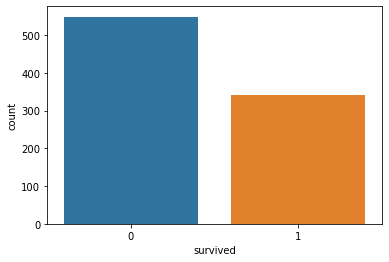

In [206]:
sns.countplot(x='survived',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

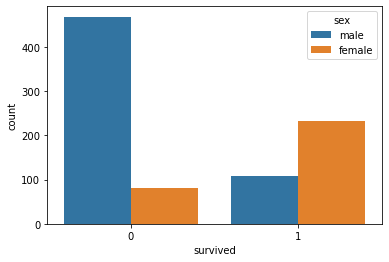

In [207]:
sns.countplot(x='survived', hue= 'sex',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

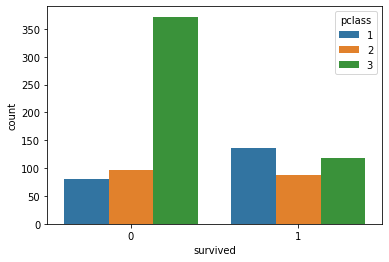

In [208]:
sns.countplot(x='survived', hue = 'pclass', data=titanic)

<AxesSubplot:ylabel='Frequency'>

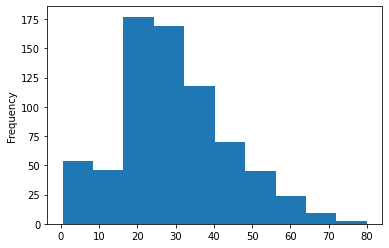

In [209]:
titanic['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

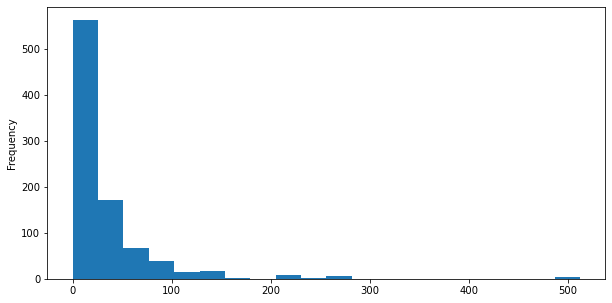

In [210]:
titanic['fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:xlabel='parch', ylabel='count'>

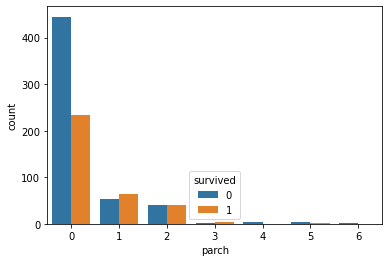

In [211]:
sns.countplot(x='parch', hue='survived',data=titanic)

## Data Cleaning

In [212]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [213]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

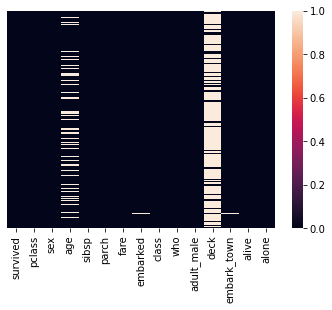

In [214]:
sns.heatmap(titanic.isnull(), yticklabels=False)

<AxesSubplot:xlabel='pclass', ylabel='age'>

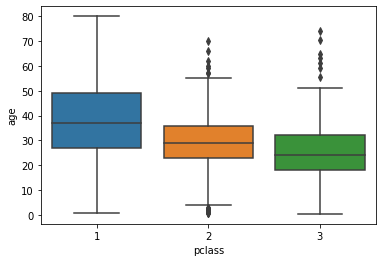

In [215]:
sns.boxplot(x='pclass', y='age',data=titanic)

In [216]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [217]:
titanic.dropna(inplace=True) #droping all NaN values

<AxesSubplot:>

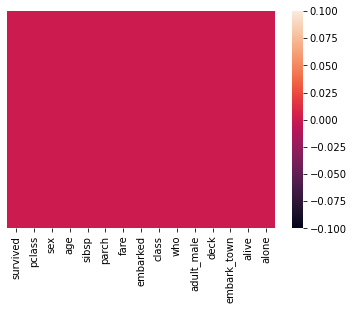

In [218]:
sns.heatmap(titanic.isnull(), yticklabels=False)

In [219]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

#### Changing String data into Categorical data

In [220]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [221]:
sex = pd.get_dummies(titanic['sex'],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [222]:
embarked = pd.get_dummies(titanic['embarked'], drop_first=True)
embarked.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [223]:
pclass = pd.get_dummies(titanic['pclass'], drop_first=True)
pclass.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [224]:
titanic=pd.concat([titanic,sex,embarked,pclass],axis=1)

In [225]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,male,Q,S,2,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,0,1,0,0
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1,0,1,0,0
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,0,0,1,0,0


In [226]:
titanic.drop(['sex','embarked','embark_town','who','class','adult_male','deck','alive','alone','pclass'],axis=1, inplace=True)

In [227]:
titanic.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


## Train the Data

In [228]:
y = titanic['survived']
x = titanic.drop('survived',axis=1)

In [229]:
from sklearn.model_selection import train_test_split

In [239]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35,random_state=19)

In [240]:
from sklearn.linear_model import LogisticRegression

In [241]:
logModel = LogisticRegression(max_iter=100,multi_class='ovr',solver='liblinear')

In [242]:
logModel.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(multi_class='ovr', solver='liblinear')

In [243]:
predictions = logModel.predict(x_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [244]:
from sklearn.metrics import classification_report

In [245]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.50      0.58      0.54        19
           1       0.81      0.76      0.78        45

    accuracy                           0.70        64
   macro avg       0.65      0.67      0.66        64
weighted avg       0.72      0.70      0.71        64



In [246]:
from sklearn.metrics import confusion_matrix

In [247]:
confusion_matrix(y_test,predictions)

array([[11,  8],
       [11, 34]], dtype=int64)

In [248]:
from sklearn.metrics import accuracy_score

In [249]:
accuracy_score(y_test,predictions)

0.703125